# Camorahan, Lorenz V. <hr style = "border:2.5px solid #0000FF"></hr>

In [54]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from scipy import stats

In [55]:
df = pd.read_csv(r"/Users/lorenzcamorahan/Desktop/Statistics/transformer-voltage-10-sample (1).csv",
                index_col='Sample',
                delimiter=",")
df

,Voltage
Sample,
1,118.3
2,119.2
3,119.7
4,119.5
5,120.0
6,120.1
7,120.2
8,120.8
9,121.5


In [56]:
df.describe()

,Voltage
count,10.000000
mean,120.110000
std,1.050344
min,118.300000
25%,119.550000
50%,120.050000
75%,120.650000
max,121.800000


In [57]:
alpha=0.05
n = df['Voltage'].count()

t_critical = stats.norm.ppf(1-alpha/2,n-1)
t_critical

np.float64(10.959963984540053)

In [58]:
pop_std = 5

ci_lower, ci_upper = stats.norm.interval(  
    confidence = 0.95,
    loc =df['Voltage'].mean(),
    scale = pop_std/np.sqrt(df['Voltage'].count())
)
print(f"Confidence Interval: [{ci_lower: .2f}, [{ci_upper: .2f}]")



Confidence Interval: [ 117.01, [ 123.21]


In [59]:
#voltage distribution
n = df['Voltage'].count()
mean = df['Voltage'].mean()
std = df['Voltage'].std(ddof=1)

ci_lower, ci_upper = stats.t.interval(
    confidence = 0.95,
    df = n-1,
    loc = mean,
    scale = std/np.sqrt(n)
)

print(ci_lower), print(ci_upper)

119.35862926677356
120.86137073322641


(None, None)

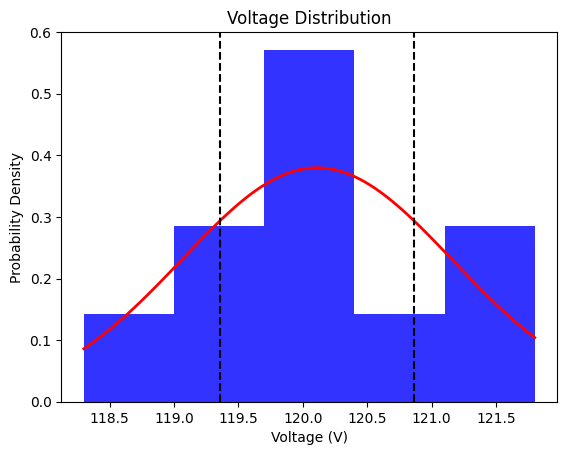

In [60]:
# x-axis
x_min = df['Voltage'].min()
x_max = df['Voltage'].max()


x = np.linspace(x_min, x_max, 100)
p = stats.norm.pdf(x, mean, std)
plt.plot(x,p,
         linewidth=2,
         color = "red"
         )

plt.hist(df['Voltage'],
         bins=5,
         density=True,
         alpha=0.8,
         color = "blue"
         )

plt.title('Voltage Distribution')
plt.ylabel('Probability Density')
plt.xlabel('Voltage (V)')

plt.axvline(x=ci_lower,
            color = 'black',
            linestyle='--',)

plt.axvline(x=ci_upper,
            color = 'black',
            linestyle='--',)
plt.show()

# Shoe Inventory <hr style = "border:2.5px solid #0000FF"></hr>

In [61]:
df = pd.read_csv(r"/Users/lorenzcamorahan/Desktop/Statistics/shoe-inventory (1).csv",
                delimiter=",")
df

,Size,Jan,Feb,Mar,Apr,May,Jun,Jul,Aug,Sep,Oct,Nov,Dec
0,6.0,4,1,3,1,3,3,3,4,3,7,3,0
1,6.5,3,2,0,1,0,0,1,7,2,1,2,1
2,7.0,0,0,1,0,6,4,4,2,3,0,0,0
3,7.5,3,2,3,1,7,0,7,3,4,6,1,1
4,8.0,7,9,7,3,12,2,9,4,7,5,2,6
5,8.5,12,12,8,8,15,9,17,17,6,9,10,6
6,9.0,17,13,13,11,21,22,25,30,26,25,13,10
7,9.5,19,25,27,24,26,33,25,47,31,44,37,26
8,10.0,17,26,26,19,16,31,25,24,23,31,15,20
9,10.5,13,16,22,14,28,19,18,15,19,21,16,10


In [62]:
df.shape

(17, 13)

In [63]:
mean_size_6 = df.iloc[0,1:13].mean()
mean_size_6

np.float64(2.9166666666666665)

In [66]:
std_size_6 = df.iloc[0,1:13].std()
std_size_6

np.float64(1.781640374554423)

In [67]:
n = df.shape[1] -1

lower_6, upper_6 = stats.t.interval(
    confidence = 0.95,
    df = n-1,
    loc = mean_size_6,
    scale = std_size_6/np.sqrt(n)
) 

print(f"CI_6:[{lower_6:.2f}, {upper_6:.2f}]")

CI_6:[0.65, 2.91]


In [68]:
mean = df.iloc[0:17,1:13].mean(axis=1)
std = df.iloc[0:17,1:13].std(axis=1)

df['ci_lower'], df['ci_upper'] = stats.t.interval(

lower_6, upper_6 = stats.t.interval(
    confidence = 0.95,
    df = n-1,
    loc = mean_size_6,
    scale = std/np.sqrt(n)
)
)

/Library/Frameworks/Python.framework/Versions/3.14/lib/python3.14/site-packages/scipy/stats/_distn_infrastructure.py:2323: RuntimeWarning: invalid value encountered in multiply
  lower_bound = _a * scale + loc
/Library/Frameworks/Python.framework/Versions/3.14/lib/python3.14/site-packages/scipy/stats/_distn_infrastructure.py:2324: RuntimeWarning: invalid value encountered in multiply
  upper_bound = _b * scale + loc


TypeError: _parse_args() got an unexpected keyword argument 'upper_6'